# SHAPES実行結果のチェック

元々`SHAPES` は、$P(r)$関数に対してシミュレーションを行っているので、動径分布関数のチェックだけでも良いが念の為、散乱強度においてもシミュレーションのチェックを行う。

・散乱曲線の比較

　　Original dataとOutput data
  
・動径分布関数の比較

　　Original dataとOutput data
  
 の2点に関して、ビーズモデルから予想される$P(r)$、$I_{fit}(q)$を比較する。
 
 両者の表示とも、結果ファイルを一括して選択した後、各ファイルのラベルを入力するプログラムになっている。
 
 始めに、ファイルの構造をチェックしておこう。
 
 $I_{fit}(q)$に関しては

In [1]:
!!head 6lyz_intensity_1.dat

['# Rvalue: 0.012 CHI-squared: 85.097',
 '0.0025 268.083 268.31071303293044',
 '0.005 267.688 267.91908469451465',
 '0.0075 267.032 267.2675296096724',
 '0.01 266.115 266.3577811119744',
 '0.0125 264.94 265.19225612372185',
 '0.015 263.511 263.7740454710893',
 '0.0175 261.833 262.1069015172529',
 '0.02 259.908 260.1952231766013',
 '0.0225 257.743 258.04403838638797']

1行目がheaderで、1列目が$q$、2列目が$I(q)$、3列めが$I_{fit}(q)$という構造になっている。

`ATSAS`では`*.fit`という拡張子がついているファイル形式であり、普通にそのままplotすると3列めが見えず、ファイルをプロットしても全く同じ？？などということが起こる。

$P(r)$に関しては

In [2]:
!!head 6lyz_pr_calc_1.dat

['#',
 '0.0 0.0 0.0',
 '0.4464 2.766541091949083 0.0',
 '0.8929 5.553805338144977 0.0',
 '1.339 8.37560817475222 0.0',
 '1.786 11.247491967455916 0.0',
 '2.232 14.195360659064583 0.0',
 '2.679 17.245118192386734 0.0',
 '3.125 20.429576228313145 0.0',
 '3.571 23.779819498214028 0.0']

さきほど同様、`*.fit`というファイル形式で、

1行目がheaderで、1列目が$r$、2列目が$P(r)$、3列めが$P_{fit}(r)$という構造になっている。

**散乱強度にせよ、動径分布関数にせよ `*.fit` のファイル形式では2列めと3列めの差分をプロットするのが普通である。**

## 散乱曲線の比較

以下のセルを実行すればモデルから予想されるフィットデータと入力ファイルの比較ができる。ここで、

グラフの上部：Original dataとOutput dataの散乱曲線がプロットされる。

グラフの下部：Original dataとOutput dataの散乱曲線のlog(I(q))の差分がプロットされる。

No handles with labels found to put in legend.


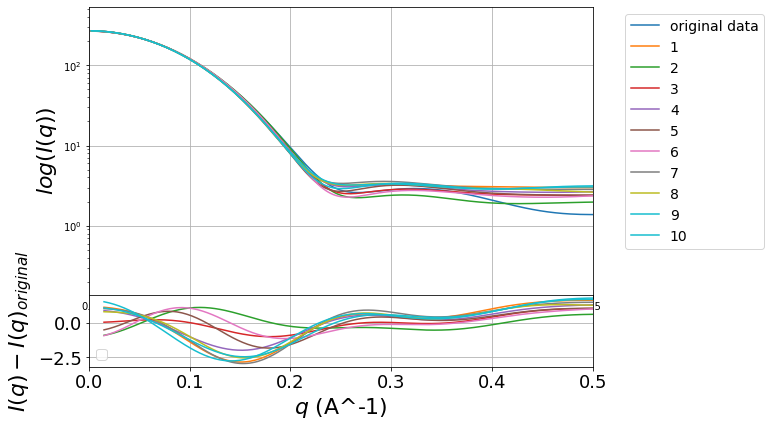

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 13 14:17:03 2018

@author: Takeuchi
modified by Fujisawa
"""

import tkinter
from tkinter import messagebox as tkMessageBox
from tkinter import filedialog as tkFileDialog
from tkinter import simpledialog as tkSimpleDialog
import os,pylab
import matplotlib.pyplot as plt

root=tkinter.Tk()
root.withdraw()

dir0=os.getcwd()
infiles=tkFileDialog.askopenfilenames(title='q-log(I(q)) plot',initialdir='.',filetypes=[("dat file","*.dat")])
dir1=os.path.dirname(infiles[0])
os.chdir(dir1)

fig = pylab.figure(figsize=(7,5))
#fig = pylab.figure()
# サブプロットを8:2で分割
ax1 = fig.add_axes((0, 0.2, 1, 0.8))
ax2 = fig.add_axes((0, 0, 1, 0.2), sharex=ax1)

# 散布図のx軸のラベルとヒストグラムのy軸のラベルを非表示
#ax1.tick_params(labelbottom="off")
#ax2.tick_params(labelleft="off")

ax1.set_ylabel(r'$log(I(q))$',fontsize=22)
ax2.set_ylabel(r'$I(q)-I(q)_{original}$',fontsize=22)
ax2.set_xlabel(r"$q$ (A^-1)",fontsize=22)
#ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)

cmap = plt.get_cmap("tab10") # ココがポイント

for i,infn in enumerate(infiles):
    pdata=pylab.loadtxt(infn,skiprows=1)
    st='label for %s' %os.path.basename(infn)
    plabel=st
    plabel=tkSimpleDialog.askstring('label for plot',os.path.basename(infn))
    if i==0:
        ax1.semilogy(pdata[5:,0],pdata[5:,1],color=cmap(0),label='original data')
        ax1.semilogy(pdata[:,0],pdata[:,-1],color=cmap(1+i),label=plabel)
    else:
        ax1.semilogy(pdata[:,0],pdata[:,-1],color=cmap(1+i),label=plabel)
    psub=pdata[5:,-1]-pdata[5:,1]
    ax2.plot(pdata[5:,0],psub,color=cmap(1+i))

ax1_ymax=max(pdata[:,1])*2
ax1_ymin=pdata[-1,1]*0.1
ax2.set_xlim(0.0,pdata[-1,0])
ax1.set_ylim(ax1_ymin,ax1_ymax)
ax1.grid()
ax2.grid()
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=14)
ax2.legend(fontsize=14)
pylab.show()

os.chdir(dir0)



## 動径分布関数の比較

以下のセルを実行すればモデルから予想されるフィットデータと入力ファイルの比較ができる。ここで、

グラフの上部：Original dataとOutput dataの動径分布関数がプロットされる。

グラフの下部：Original dataとOutput dataの動径分布関数の$P(r)$の差がプロットされる。

No handles with labels found to put in legend.


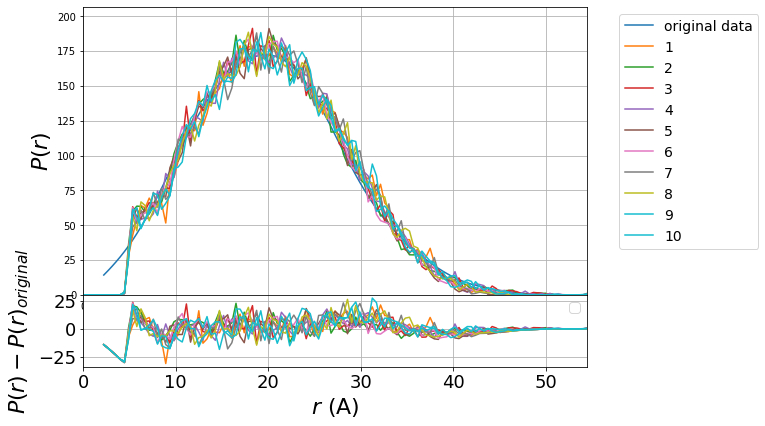

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 13 14:17:03 2018

@author: Takeuchi
modified by Fujisawa
"""

import tkinter
from tkinter import messagebox as tkMessageBox
from tkinter import filedialog as tkFileDialog
from tkinter import simpledialog as tkSimpleDialog
import os,pylab
import matplotlib.pyplot as plt

root=tkinter.Tk()
root.withdraw()

dir0=os.getcwd()
infiles=tkFileDialog.askopenfilenames(title='q-log(I(q)) plot',initialdir='.',filetypes=[("dat file","*.dat")])
dir1=os.path.dirname(infiles[0])
os.chdir(dir1)

fig = pylab.figure(figsize=(7,5))
#fig = pylab.figure()
# サブプロットを8:2で分割
ax1 = fig.add_axes((0, 0.2, 1, 0.8))
ax2 = fig.add_axes((0, 0, 1, 0.2), sharex=ax1)

# 散布図のx軸のラベルとヒストグラムのy軸のラベルを非表示
#ax1.tick_params(labelbottom="off")
#ax2.tick_params(labelleft="off")

ax1.set_ylabel(r'$P(r)$',fontsize=22)
ax2.set_ylabel(r'$P(r)-P(r)_{original}$',fontsize=22)
ax2.set_xlabel(r"$r$ (A)",fontsize=22)
#ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)

cmap = plt.get_cmap("tab10") # ココがポイント

for i,infn in enumerate(infiles):
    pdata=pylab.loadtxt(infn,skiprows=1)
    st='label for %s' %os.path.basename(infn)
    plabel=st
    plabel=tkSimpleDialog.askstring('label for plot',os.path.basename(infn))
    if i==0:
        ax1.plot(pdata[5:,0],pdata[5:,1],color=cmap(0),label='original data')
        ax1.plot(pdata[:,0],pdata[:,-1],color=cmap(1+i),label=plabel)
    else:
        ax1.plot(pdata[:,0],pdata[:,-1],color=cmap(1+i),label=plabel)
    psub=pdata[5:,-1]-pdata[5:,1]
    ax2.plot(pdata[5:,0],psub,color=cmap(1+i))

ax1_ymax=max(pdata[:,1])*1.2
ax1_ymin=0.0
ax2.set_xlim(0.0,pdata[-1,0])
ax1.set_ylim(ax1_ymin,ax1_ymax)
ax1.grid()
ax2.grid()
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=14)
ax2.legend(fontsize=14)
pylab.show()

os.chdir(dir0)

